In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Some Libraries Imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime

In [3]:
# The tech stocks we'll use for this analysis
tech_list = {'sumas':'SUMAS.IS', 'orma':'ORMA.IS', 
             'yonga':'YONGA.IS', 'lbs':'LBS=F', 'xu100':'XU100.IS'}

In [4]:
# Set up End and Start times for data grab (We will analyze for 2 years)
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

In [5]:
#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(tech_list[stock], 'yahoo', start, end)

In [6]:
company_list = [sumas, orma, yonga, lbs,xu100]
company_name = ["SUMAS.IS", "ORMA.IS", "YONGA.IS", "LBS=F",'XU100']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

In [7]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2022-09-09,3545.899902,3452.199951,3465.100098,3521.399902,6.467120e+09,3521.399902,XU100
2022-09-12,3650.100098,3543.899902,3557.699951,3649.199951,7.363322e+09,3649.199951,XU100
2022-09-13,3715.300049,3426.899902,3684.199951,3426.899902,8.392000e+09,3426.899902,XU100
2022-09-14,3447.000000,3277.399902,3419.100098,3447.000000,4.599603e+09,3447.000000,XU100
2022-09-15,3494.379883,3355.149902,3456.439941,3363.120117,0.000000e+00,3363.120117,XU100


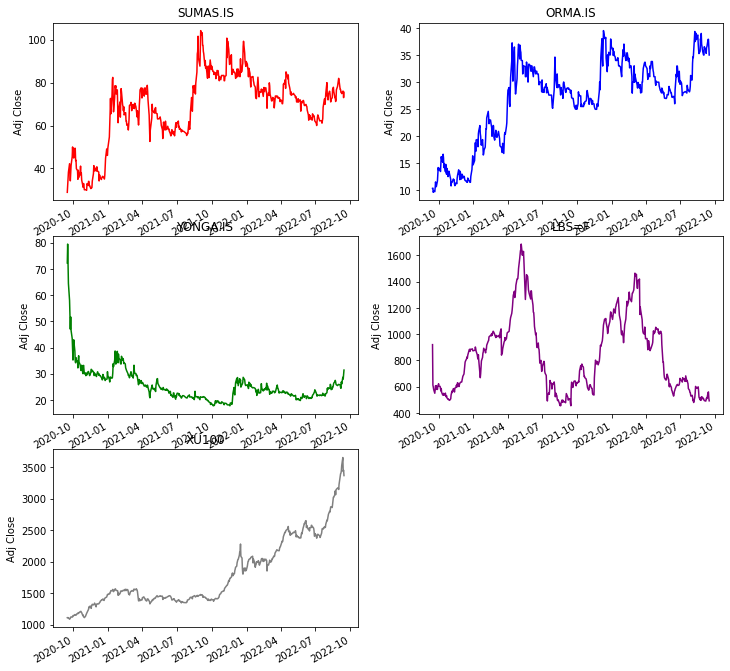

In [8]:
# Let's see a historical view of the closing price of companies

plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)
colorlist=['Red','Blue','Green','Purple','Gray','Orange']
for i, company in enumerate(company_list, 1):
    plt.subplot(int(len(company_list)/2)+1, 2, i)
    company['Adj Close'].plot(color=colorlist[i-1])
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{company_name[i - 1]}")

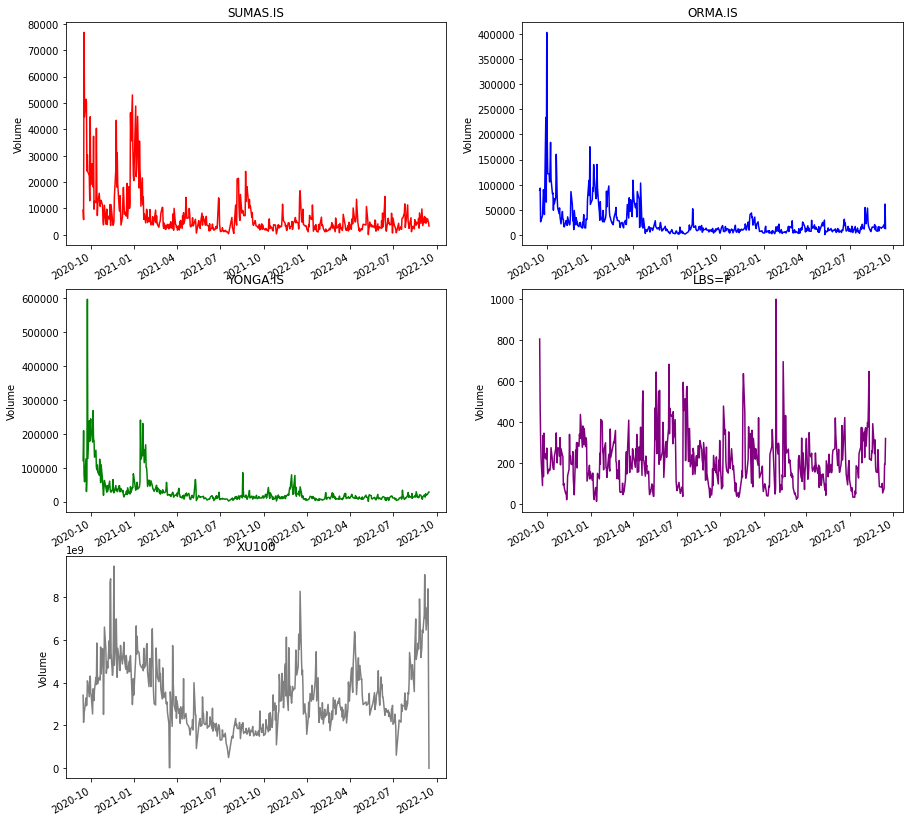

In [9]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
colorlist=['Red','Blue','Green','Purple','Gray','Orange']
for i, company in enumerate(company_list, 1):
    plt.subplot(int(len(company_list)/2)+1, 2, i)
    company['Volume'].plot(color=colorlist[i-1])
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{company_name[i - 1]}")

In [10]:
# Set the Moving Average Day
ma_day = [10, 20, 50]

In [11]:
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [12]:
sumas.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')

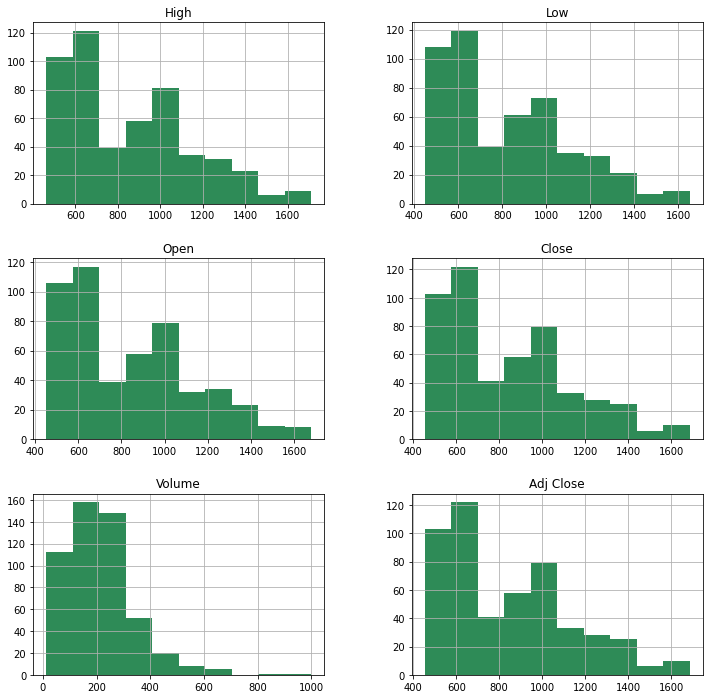

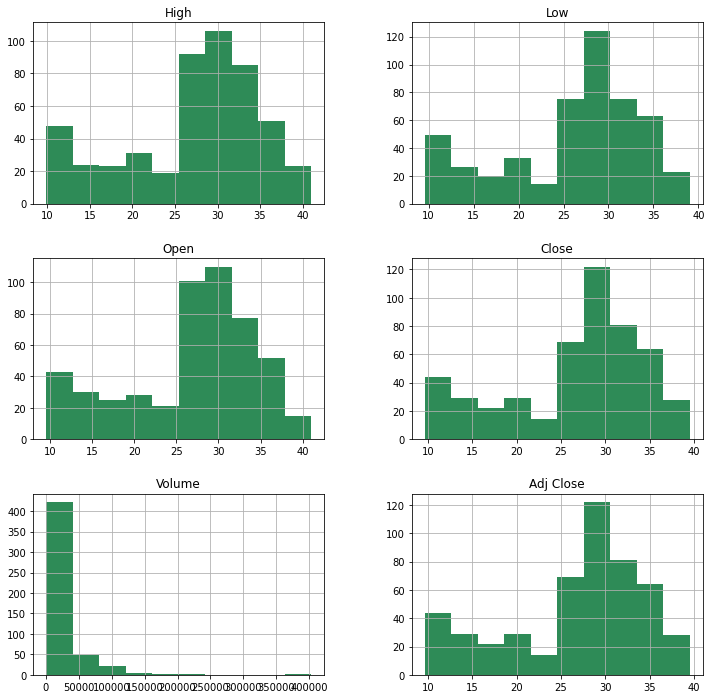

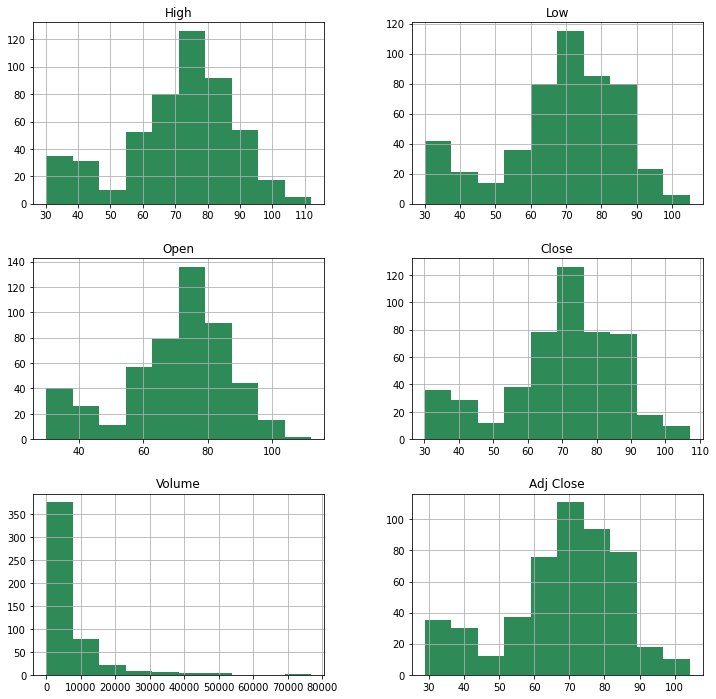

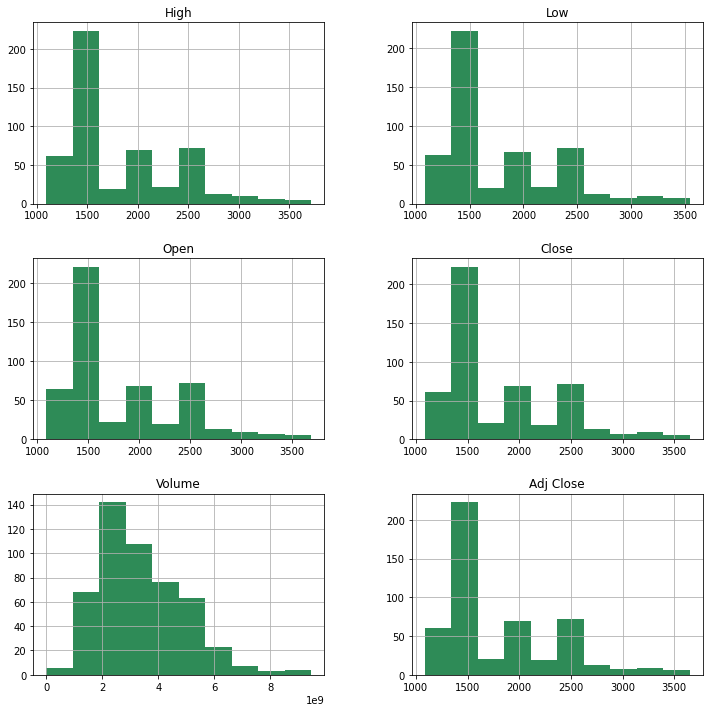

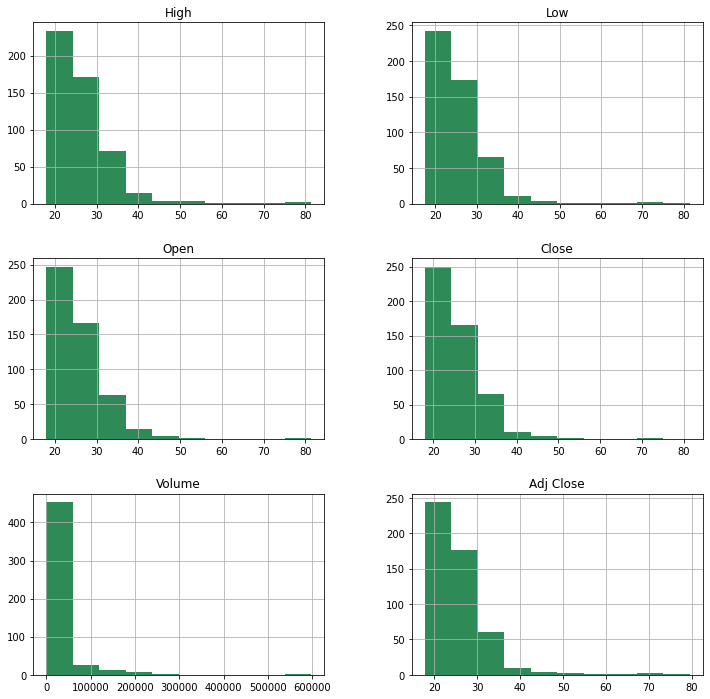

In [13]:
df.groupby("company_name").hist(figsize=(12, 12),color='seagreen');

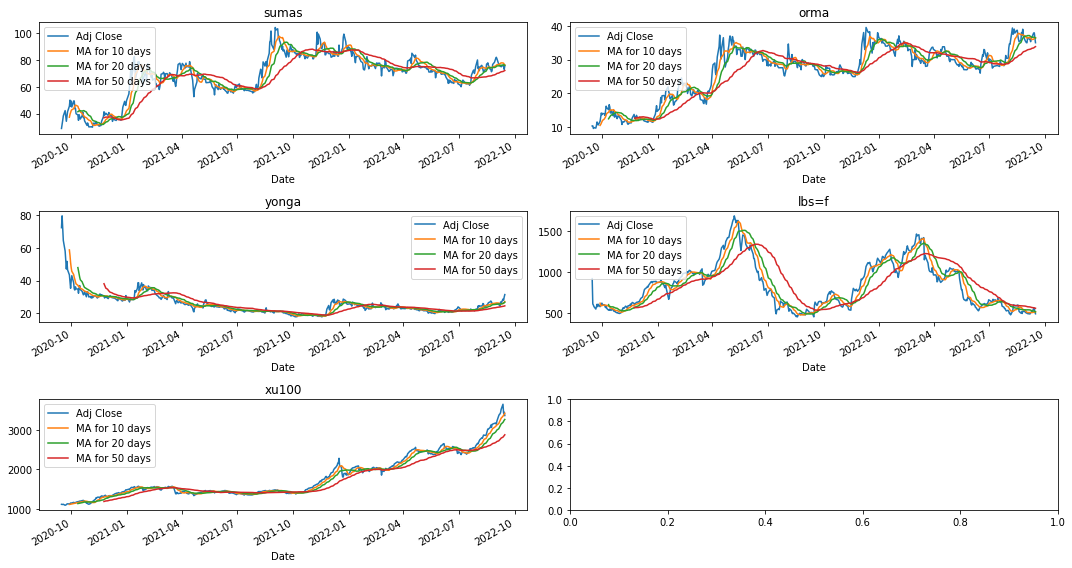

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

sumas[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('sumas')

orma[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('orma')

yonga[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('yonga')

lbs[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('lbs=f')

xu100[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('xu100')

fig.tight_layout()

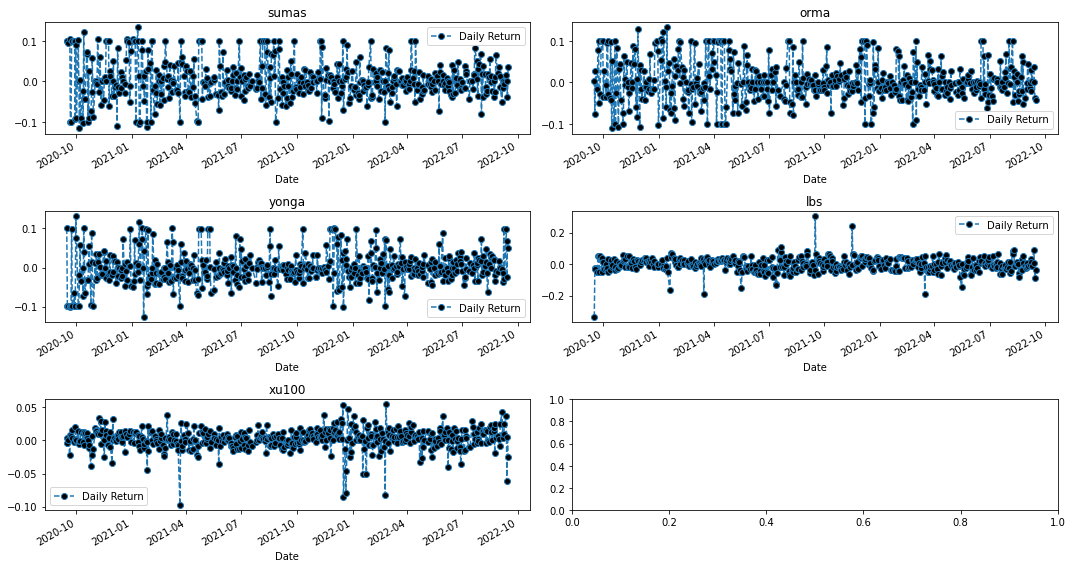

In [15]:
# We'll use pct_change to find the percent change for each day
# FOR DAILY RETURN
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

sumas['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o',markerfacecolor='black')
axes[0,0].set_title('sumas')

orma['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o',markerfacecolor='black')
axes[0,1].set_title('orma')

yonga['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o',markerfacecolor='black')
axes[1,0].set_title('yonga')

lbs['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o',markerfacecolor='black')
axes[1,1].set_title('lbs')

xu100['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o',markerfacecolor='black')
axes[2,0].set_title('xu100')

fig.tight_layout()


SUMAS.IS Skewness: 0.306731
SUMAS.IS Kurtosis: 0.268965
ORMA.IS Skewness: 0.342497
ORMA.IS Kurtosis: 0.040747
YONGA.IS Skewness: 0.372200
YONGA.IS Kurtosis: 1.046930
LBS=F Skewness: -0.434340
LBS=F Kurtosis: 12.418896
XU100 Skewness: -1.484940
XU100 Kurtosis: 7.510023


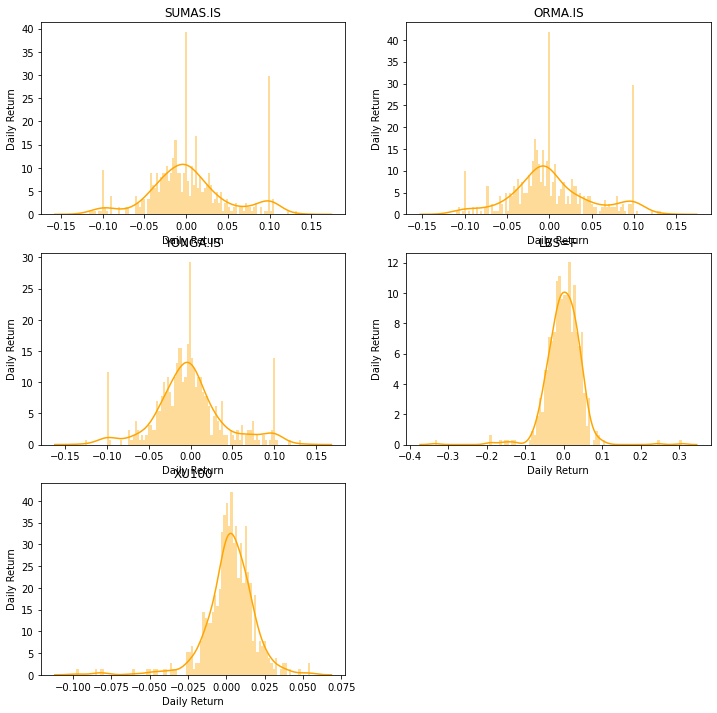

In [16]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(int(len(company_list)/2)+1, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='orange')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    # Skewness and Kurtosis
    print(f'{company_name[i - 1]}'+" Skewness: %f" % company['Daily Return'].skew())
    print(f'{company_name[i - 1]}'+" Kurtosis: %f" % company['Daily Return'].kurt())
# Could have also done:
#AAPL['Daily Return'].hist()

In [17]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(company_name, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,SUMAS.IS,ORMA.IS,YONGA.IS,LBS=F,XU100
Date,,,,,
2020-09-15,28.838196,10.40,72.254494,920.000000,NaN
2020-09-16,31.722019,10.44,79.479935,612.000000,NaN
2020-09-17,34.892307,9.66,71.571007,597.599976,NaN
2020-09-18,38.196289,9.92,64.443192,578.599976,NaN
2020-09-21,42.187798,9.77,57.998878,549.599976,NaN


In [18]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,SUMAS.IS,ORMA.IS,YONGA.IS,LBS=F,XU100
Date,,,,,
2020-09-15,NaN,NaN,NaN,NaN,NaN
2020-09-16,0.100000,0.003846,0.100000,-0.334783,NaN
2020-09-17,0.099940,-0.074713,-0.099508,-0.023529,NaN
2020-09-18,0.094691,0.026915,-0.099591,-0.031794,NaN
2020-09-21,0.104500,-0.015121,-0.100000,-0.050121,NaN


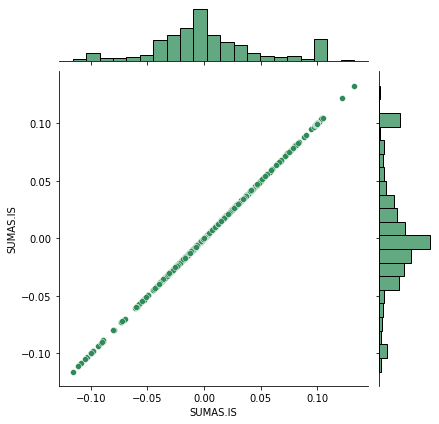

In [19]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('SUMAS.IS', 'SUMAS.IS', tech_rets, kind='scatter', color='seagreen')

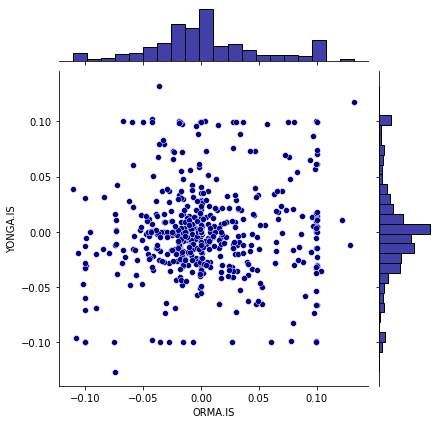

In [20]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('ORMA.IS', 'YONGA.IS', tech_rets, kind='scatter',color='darkblue')

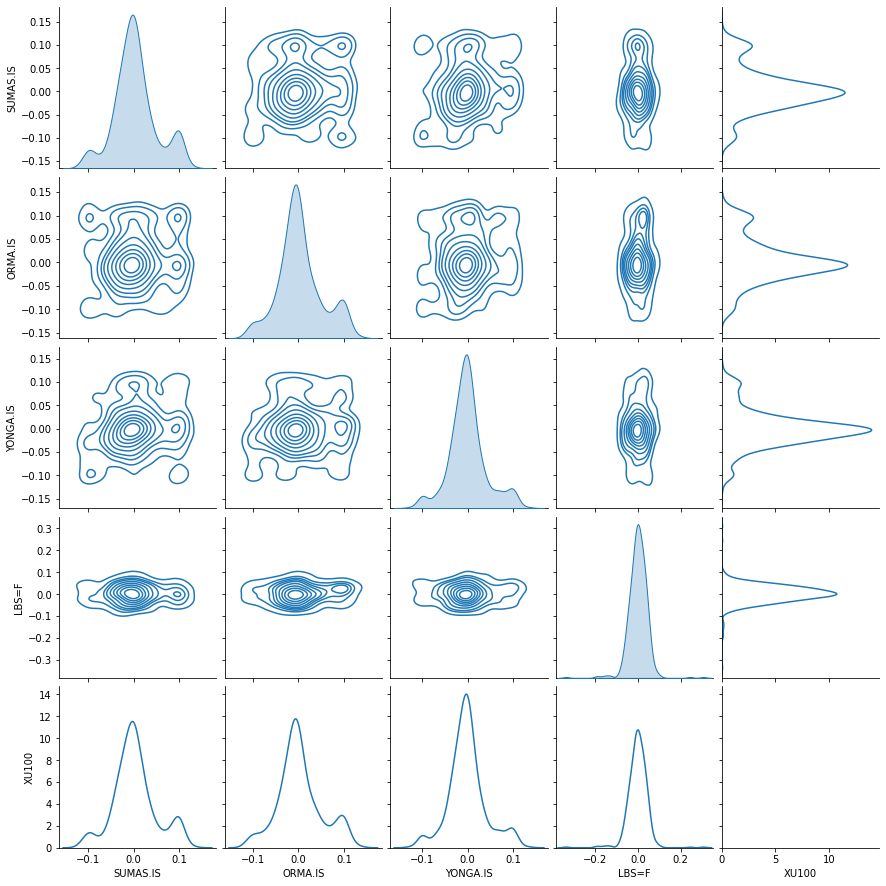

In [21]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='kde')

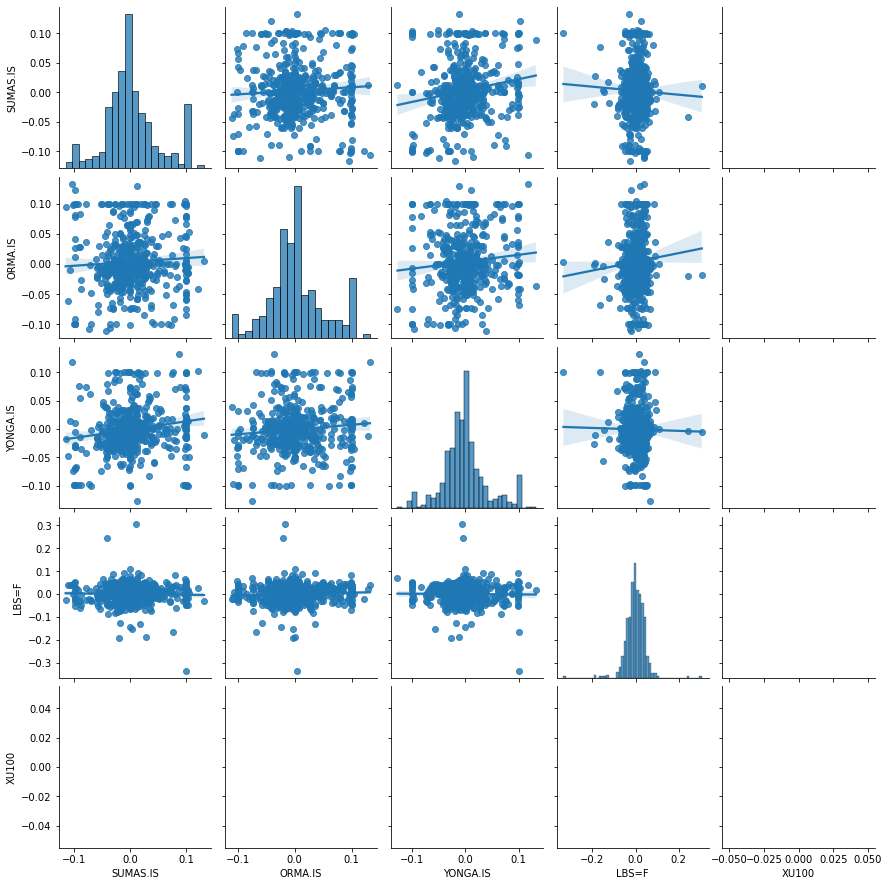

In [22]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

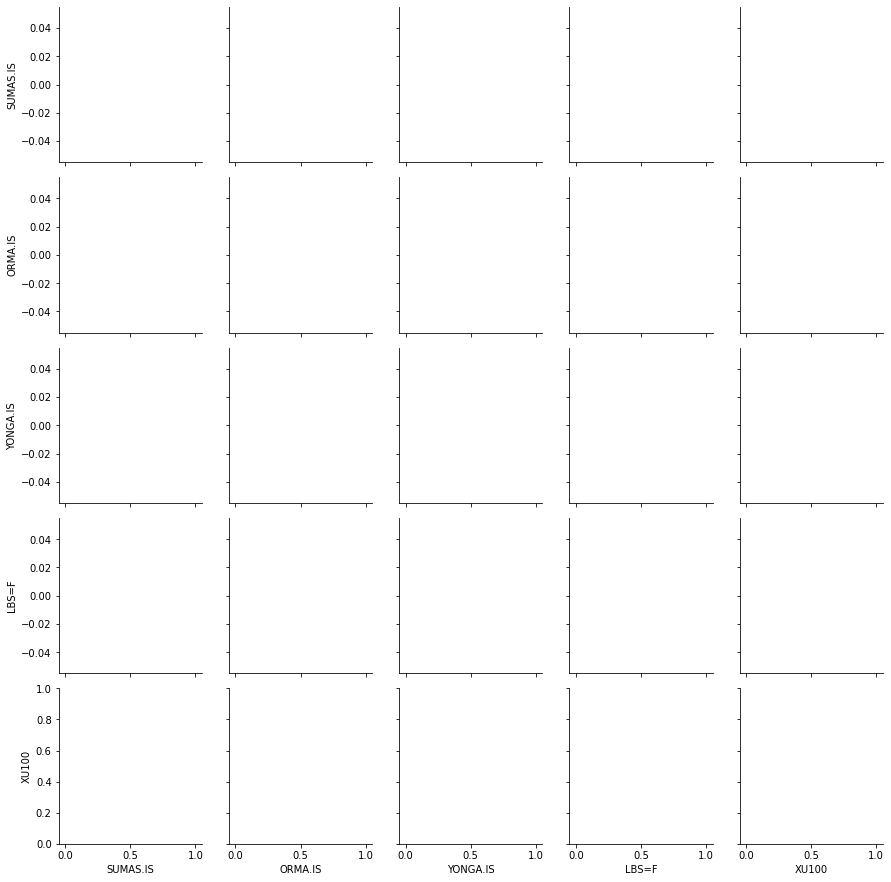

In [23]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='seagreen')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='Greens_r')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

AttributeError: ignored

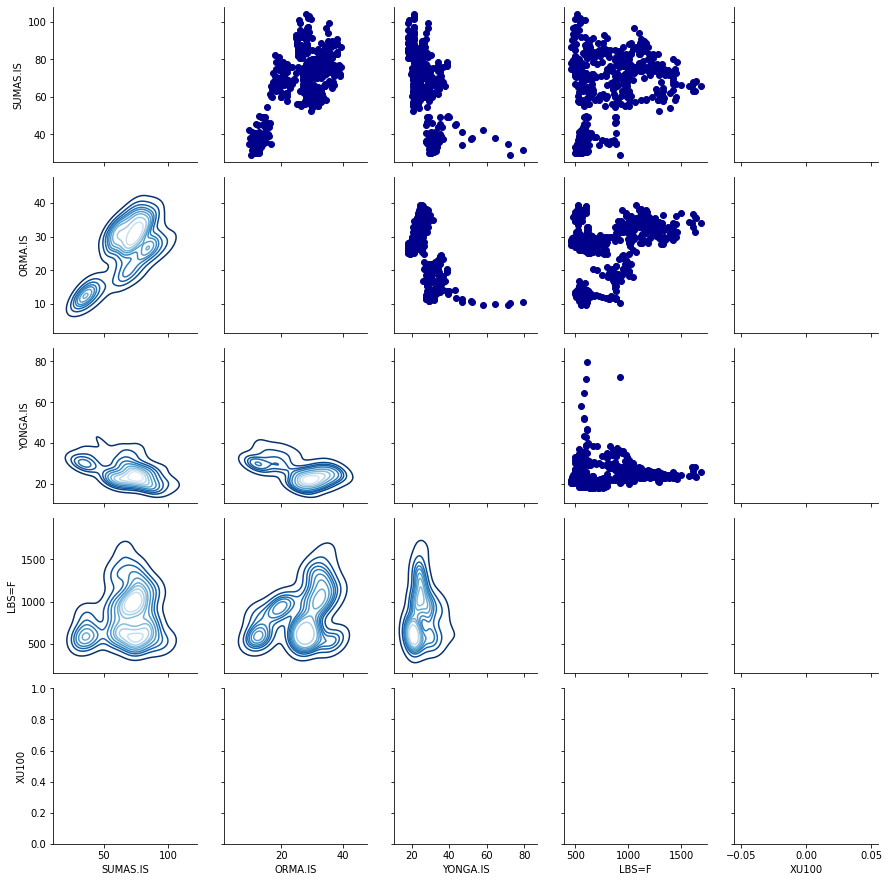

In [24]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='darkblue')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='Blues_r')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

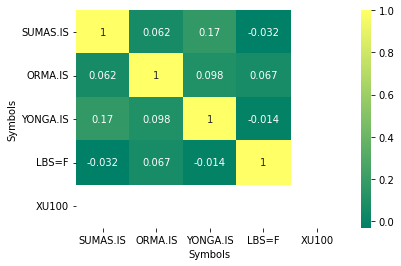

In [25]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

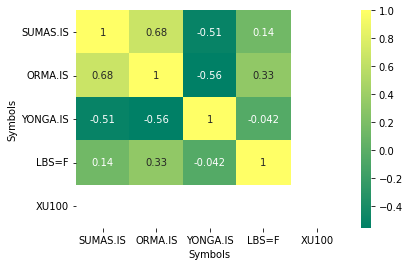

In [26]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

In [27]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

StopIteration: ignored

<Figure size 864x720 with 1 Axes>

In [28]:
Column_List = ["High", "Low","Open","Close", "Volume","Adj Close"]

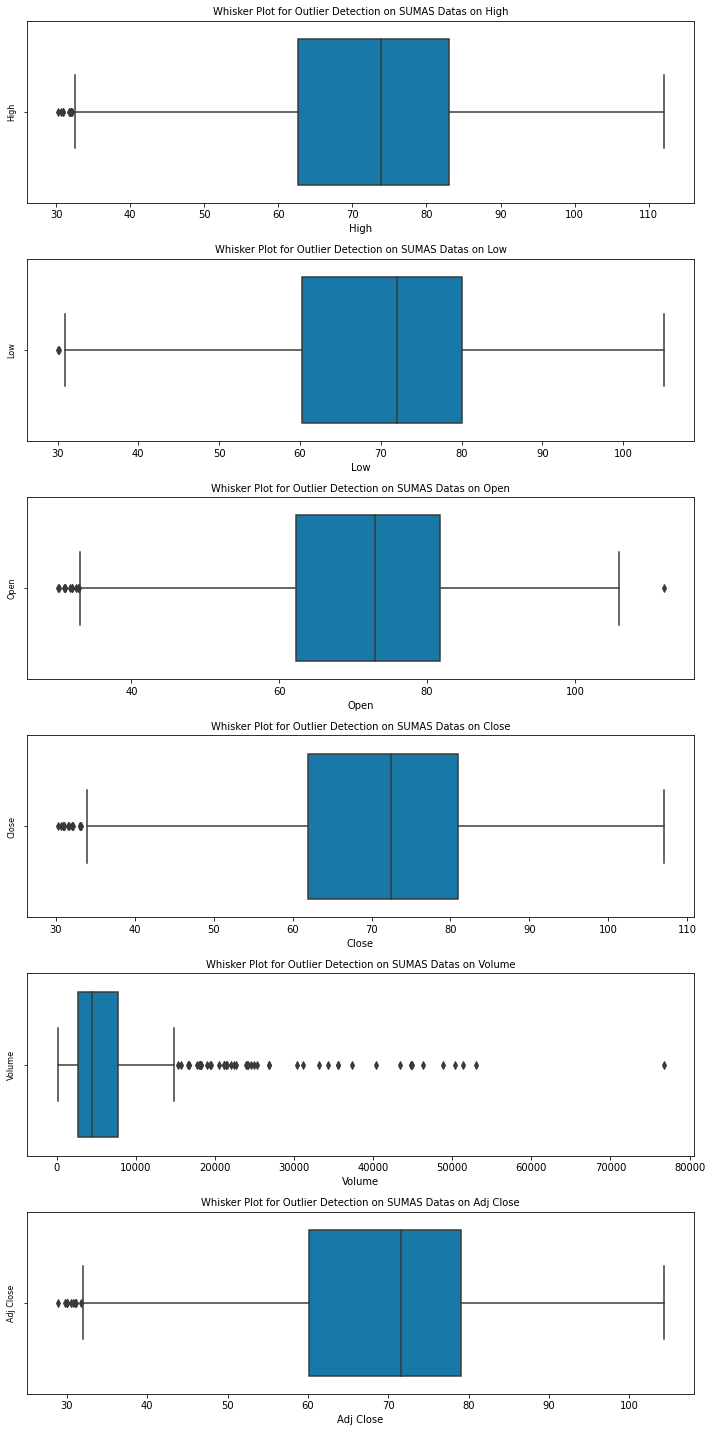

In [29]:
# Generate whisker plots to detect the presence of any outliers
fig, ax = plt.subplots (len(Column_List), figsize = (10, 20))

for i, col_list in enumerate(Column_List):
    sns.boxplot(sumas[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on SUMAS Datas on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

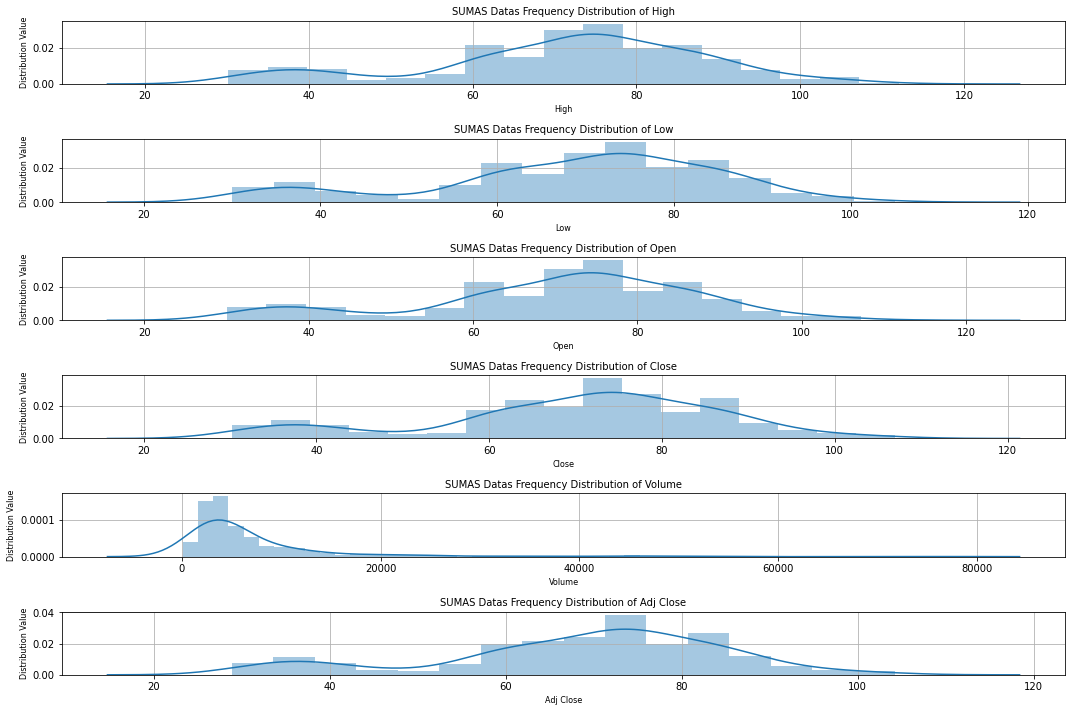

In [30]:
# Visualize the spread and skweness through the distribution plot

# Use the Column_List : list initialized above in the following steps
fig, ax = plt.subplots(len(Column_List), figsize = (15, 10))

for i, col_list in enumerate(Column_List):
    sns.distplot(sumas[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("SUMAS Datas Frequency Distribution of" + " " + col_list, fontsize = 10)
    ax[i].set_xlabel (col_list, fontsize = 8)
    ax[i].set_ylabel ('Distribution Value', fontsize = 8)
    fig.tight_layout (pad = 1.1) # To provide space between plots
    ax[i].grid('on') # Enabled to view and make markings

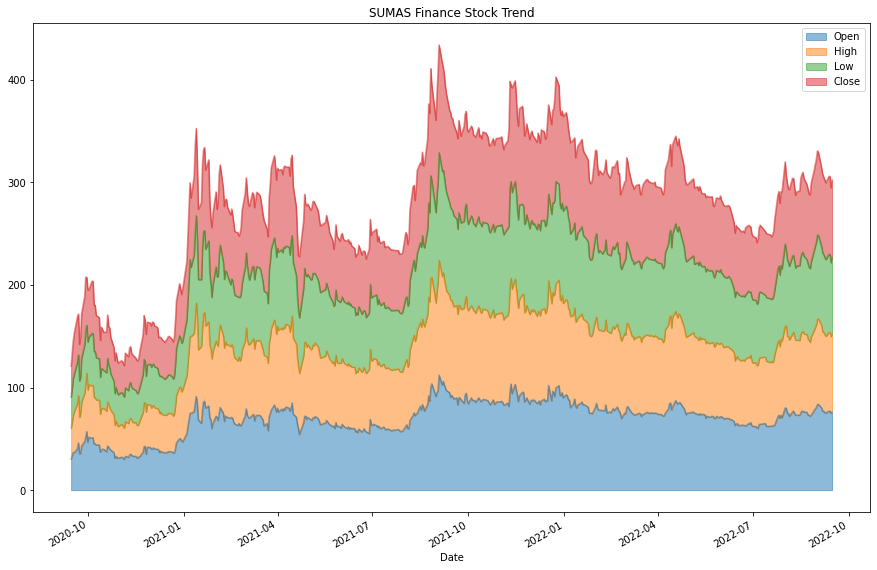

In [31]:
sumas[["Open","High","Low","Close"]].plot.area(figsize=(15,10),alpha=0.5);
plt.title('SUMAS Finance Stock Trend')
plt.show()

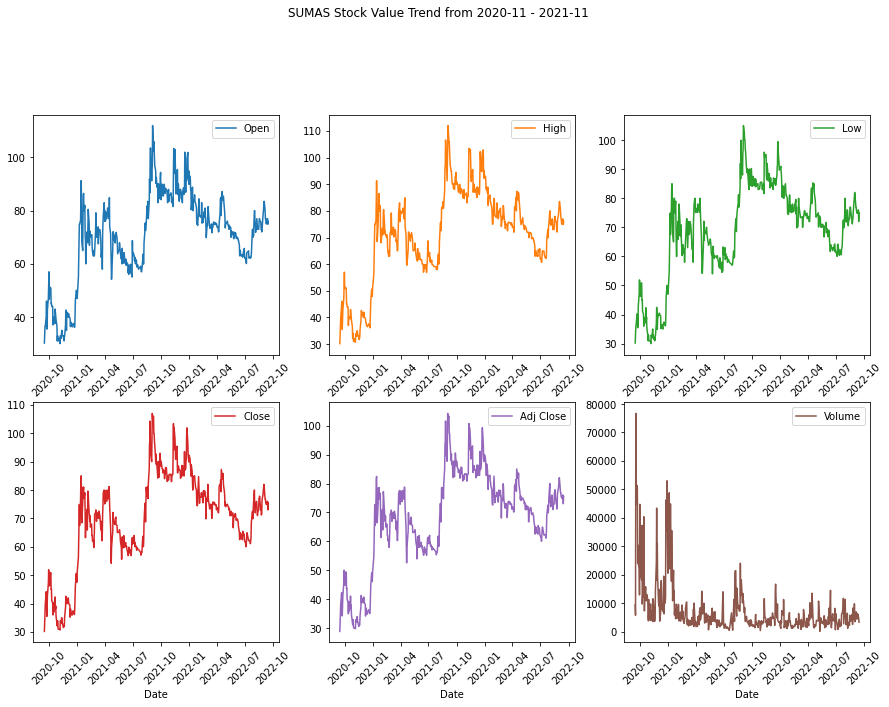

In [32]:
# A glimpse of how the market shares varied over the given time

# Create a list for numerical columns that are to be visualized
Column_List = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Plot to view the same
sumas.plot(y = Column_List, subplots = True, layout = (3, 3), figsize = (15, 15), sharex = False, title = "SUMAS Stock Value Trend from 2020-11 - 2021-11", rot = 45);

PREDICITON

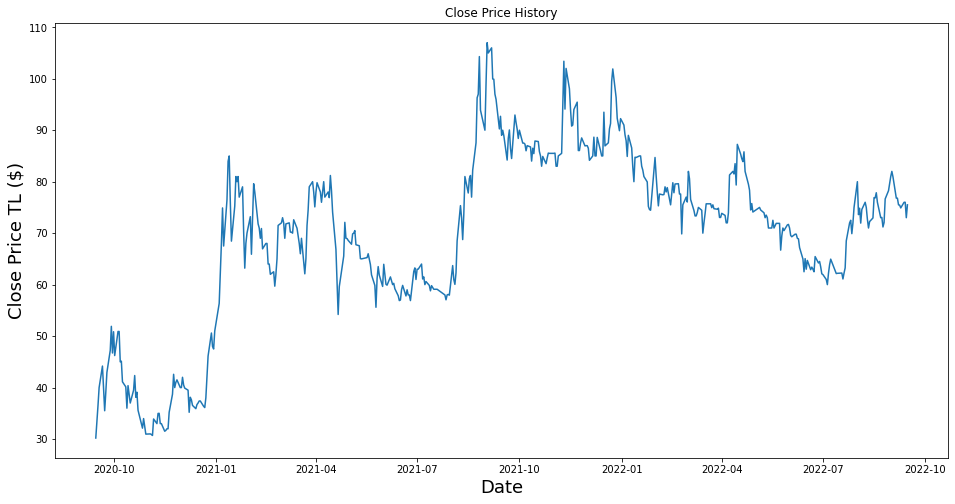

In [33]:
df = sumas
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price TL ($)', fontsize=18)
plt.show()

In [34]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

402

In [35]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data[0:5]

array([[0.        ],
       [0.03932292],
       [0.08255209],
       [0.12760416],
       [0.18203125]])

In [36]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.        , 0.03932292, 0.08255209, 0.12760416, 0.18203125,
       0.12499998, 0.06901041, 0.11510417, 0.16588539, 0.22161459,
       0.2825521 , 0.21510417, 0.26888018, 0.20859376, 0.26953126,
       0.26953126, 0.19270833, 0.19453123, 0.14218748, 0.12942707,
       0.07552082, 0.13255209, 0.10989582, 0.08854166, 0.12109374,
       0.15807291, 0.10312498, 0.11588539, 0.07031247, 0.03645832,
       0.02499998, 0.04921873, 0.00989581, 0.01041666, 0.01041666,
       0.00911457, 0.00651042, 0.04817709, 0.03645832, 0.06223957,
       0.06249999, 0.03645832, 0.03645832, 0.0171875 , 0.01927083,
       0.02343749, 0.02343749, 0.06510417, 0.11093751, 0.16119793,
       0.12760416, 0.14062499, 0.14713541, 0.12760416, 0.12760416,
       0.15364582, 0.13411457, 0.12630209, 0.12109374, 0.06510417])]
[0.10312497718259672]

[array([0.        , 0.03932292, 0.08255209, 0.12760416, 0.18203125,
       0.12499998, 0.06901041, 0.11510417, 0.16588539, 0.22161459,
       0.2825521 , 0.21510417, 0.26

In [37]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model_lstm.add(LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model_lstm.fit(x_train, y_train, batch_size=20, epochs=20)

Epoch 1/20
18/18 [==============================] - 5s 62ms/step - loss: 0.0693
Epoch 2/20
18/18 [==============================] - 1s 59ms/step - loss: 0.0110
Epoch 3/20
18/18 [==============================] - 1s 59ms/step - loss: 0.0082
Epoch 4/20
18/18 [==============================] - 1s 60ms/step - loss: 0.0077
Epoch 5/20
18/18 [==============================] - 1s 61ms/step - loss: 0.0072
Epoch 6/20
18/18 [==============================] - 1s 59ms/step - loss: 0.0069
Epoch 7/20
18/18 [==============================] - 1s 60ms/step - loss: 0.0064
Epoch 8/20
18/18 [==============================] - 1s 60ms/step - loss: 0.0059
Epoch 9/20
18/18 [==============================] - 1s 60ms/step - loss: 0.0058
Epoch 10/20
18/18 [==============================] - 1s 59ms/step - loss: 0.0062
Epoch 11/20
18/18 [==============================] - 1s 61ms/step - loss: 0.0053
Epoch 12/20
18/18 [==============================] - 1s 76ms/step - loss: 0.0054
Epoch 13/20
18/18 [==================

In [39]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
model_rnn = Sequential()

# adding first RNN layer and dropout regulatization
model_rnn.add(SimpleRNN(units = 50,activation = "tanh", return_sequences = True,input_shape = (x_train.shape[1],1)))
model_rnn.add(Dropout(0.2))
# adding second RNN layer and dropout regulatization
model_rnn.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
model_rnn.add(Dropout(0.2))
# adding third RNN layer and dropout regulatization
model_rnn.add(SimpleRNN(units = 50,activation = "tanh", return_sequences = False))
model_rnn.add(Dropout(0.2))
# adding the output layer
model_rnn.add(Dense(units = 1))
# compiling RNN
model_rnn.compile(optimizer = "adam", loss = "mean_squared_error")
# fitting the RNN
model_rnn.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
11/11 [==============================] - 3s 40ms/step - loss: 0.3403
Epoch 2/100
11/11 [==============================] - 0s 41ms/step - loss: 0.2528
Epoch 3/100
11/11 [==============================] - 0s 40ms/step - loss: 0.2237
Epoch 4/100
11/11 [==============================] - 0s 40ms/step - loss: 0.2365
Epoch 5/100
11/11 [==============================] - 0s 43ms/step - loss: 0.1935
Epoch 6/100
11/11 [==============================] - 0s 40ms/step - loss: 0.1478
Epoch 7/100
11/11 [==============================] - 0s 39ms/step - loss: 0.1233
Epoch 8/100
11/11 [==============================] - 0s 41ms/step - loss: 0.1040
Epoch 9/100
11/11 [==============================] - 0s 39ms/step - loss: 0.0887
Epoch 10/100
11/11 [==============================] - 0s 40ms/step - loss: 0.0858
Epoch 11/100
11/11 [==============================] - 0s 40ms/step - loss: 0.0838
Epoch 12/100
11/11 [==============================] - 0s 41ms/step - loss: 0.0627
Epoch 13/100
11/11 [=====

In [40]:
# Get the LSTM model predicted price values 
predictions_lstm = model_lstm.predict(x_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)

In [41]:
# Get the RNN models predicted price values 
predictions_rnn = model_rnn.predict(x_test)
predictions_rnn = scaler.inverse_transform(predictions_rnn)

In [42]:
from sklearn import metrics

# Get the root mean squared error (RMSE)
mse_lstm = metrics.mean_squared_error(y_test, predictions_lstm)
rmse_lstm = np.sqrt(mse_lstm)

print("LSTM Model RMSE: ",rmse_lstm)
# Get r2 score
r2_lstm = metrics.r2_score(y_test, predictions_lstm)
print("LSTM Model r2: ",r2_lstm)

LSTM Model RMSE:  3.666815583005048
LSTM Model r2:  0.6268383121250598


In [43]:
# Get the root mean squared error (RMSE)
mse_rnn = metrics.mean_squared_error(y_test, predictions_rnn)
rmse_rnn = np.sqrt(mse_rnn)

print("RNN Model RMSE: ",rmse_rnn)
# Get r2 score
r2_rnn = metrics.r2_score(y_test, predictions_rnn)
print("RNN Model r2: ",r2_rnn)

RNN Model RMSE:  3.749481861695914
RNN Model r2:  0.6098232147167202


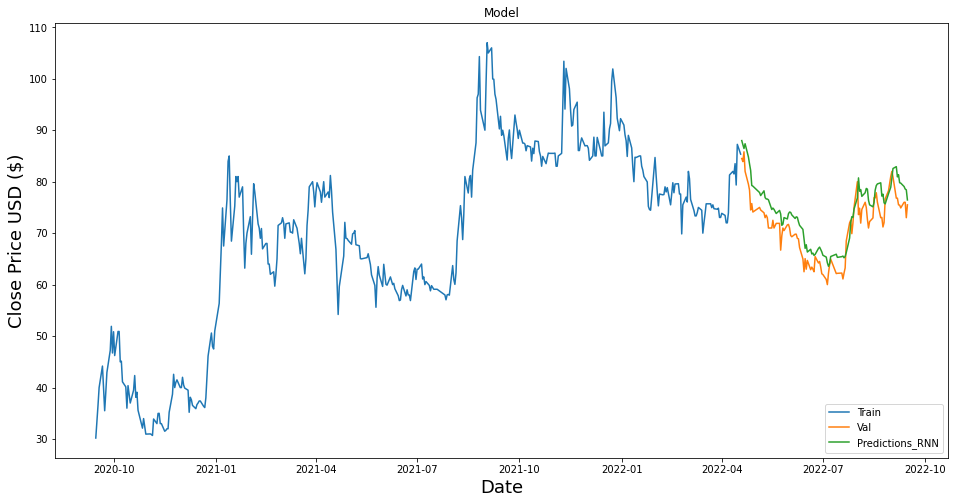

In [44]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions_RNN'] = predictions_rnn
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions_RNN']])
plt.legend(['Train', 'Val', 'Predictions_RNN'], loc='lower right')
plt.show()

In [45]:
#Show the valid and predicted prices
valid[0:10]

,Close,Predictions_RNN
Date,,
2022-04-19,84.500000,87.983345
2022-04-20,83.900002,87.193275
2022-04-21,85.800003,86.441078
2022-04-22,82.000000,87.370743
2022-04-25,79.500000,84.803436
2022-04-26,78.349998,83.443810
2022-04-27,74.500000,82.190109
2022-04-28,75.750000,79.264503
2022-04-29,74.099998,79.133995


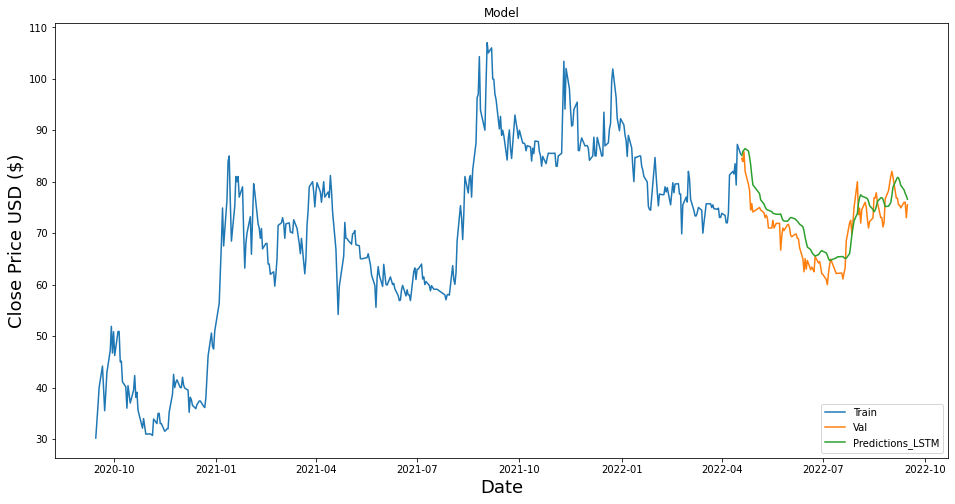

In [46]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions_LSTM'] = predictions_lstm
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions_LSTM']])
plt.legend(['Train', 'Val', 'Predictions_LSTM'], loc='lower right')
plt.show()